# Create ensemble tier file

In [8]:
import os
if 'notebooks' in os.getcwd():
    os.chdir('../..')  # change to main directory
if 'adrian_sensorium' not in os.getcwd():
    if os.getcwd().split('\\')[-1] == "Petreanu Lab":
        os.chdir('adrian_sensorium')
    else:
        raise FileNotFoundError("The path needs to be fixed")
print('Working directory:', os.getcwd())

Working directory: d:\Python\Anastasia\Petreanu Lab\adrian_sensorium


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [10]:
%matplotlib inline

In [11]:
# folders = sorted( glob.glob( "notebooks/data/static*/") )
# folders

In [12]:
basepath = "notebooks/data/IM_prezipped"
# Add Add folders two levels deep from basepath into a list
# First level
folders = [os.path.join(basepath, name) for name in os.listdir(
    basepath) if os.path.isdir(os.path.join(basepath, name)) and not "merged_data" in name]
# Second level
folders = [os.path.join(folder, name) for folder in folders for name in os.listdir(
    folder) if os.path.isdir(os.path.join(folder, name)) and not "merged_data" in name]
folders = [x.replace("\\", "/") for x in folders]
folders

['notebooks/data/IM_prezipped/LPE09665/2023_03_20',
 'notebooks/data/IM_prezipped/LPE10883/2023_10_23',
 'notebooks/data/IM_prezipped/LPE10883/2023_10_31',
 'notebooks/data/IM_prezipped/LPE10884/2023_10_12',
 'notebooks/data/IM_prezipped/LPE10885/2023_10_20',
 'notebooks/data/IM_prezipped/LPE10919/2023_11_09',
 'notebooks/data/IM_prezipped/LPE11086/2023_12_16',
 'notebooks/data/IM_prezipped/LPE11086/2024_01_09',
 'notebooks/data/IM_prezipped/LPE11495/2024_02_29',
 'notebooks/data/IM_prezipped/LPE11998/2024_05_08',
 'notebooks/data/IM_prezipped/LPE12223/2024_06_11']

In [13]:
# helper function for plotting
def tier_to_int(tier_str):
    tier_int = np.zeros_like(tier_str, dtype=int)
    tier_int[tier_str == 'train'] = 0
    tier_int[tier_str == 'validation'] = 1
    tier_int[tier_str == 'test'] = 2
    tier_int[tier_str == 'final_test'] = 3
    return tier_int

Working on:  notebooks/data/IM_prezipped/LPE09665/2023_03_20
Working on:  notebooks/data/IM_prezipped/LPE10883/2023_10_23
Working on:  notebooks/data/IM_prezipped/LPE10883/2023_10_31
Working on:  notebooks/data/IM_prezipped/LPE10884/2023_10_12
Working on:  notebooks/data/IM_prezipped/LPE10885/2023_10_20
Working on:  notebooks/data/IM_prezipped/LPE10919/2023_11_09
Working on:  notebooks/data/IM_prezipped/LPE11086/2023_12_16
Working on:  notebooks/data/IM_prezipped/LPE11086/2024_01_09
Working on:  notebooks/data/IM_prezipped/LPE11495/2024_02_29
Working on:  notebooks/data/IM_prezipped/LPE11998/2024_05_08
Working on:  notebooks/data/IM_prezipped/LPE12223/2024_06_11


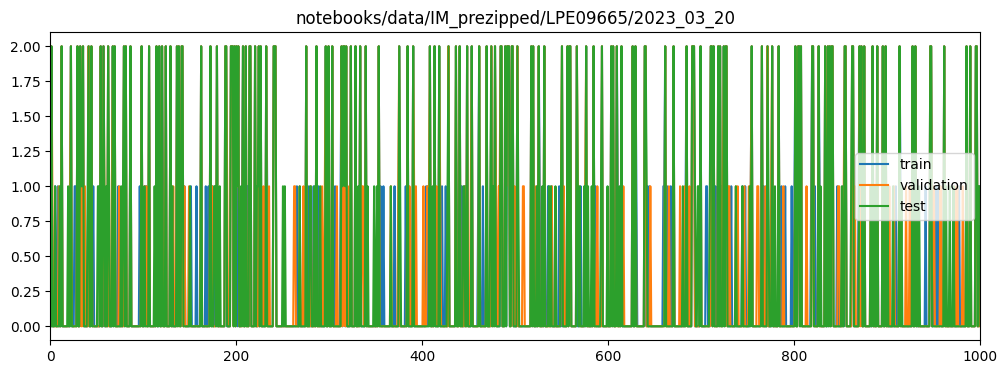

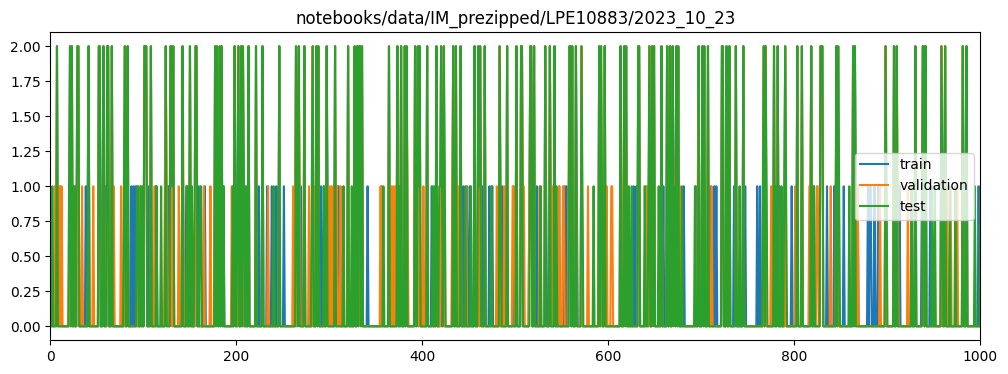

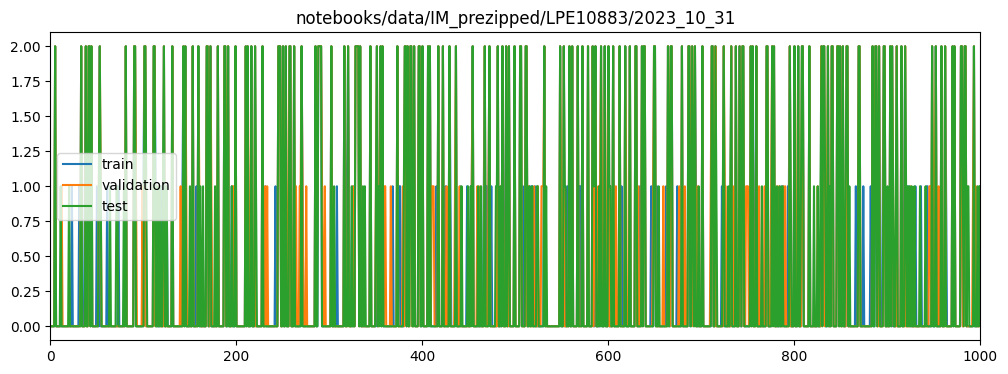

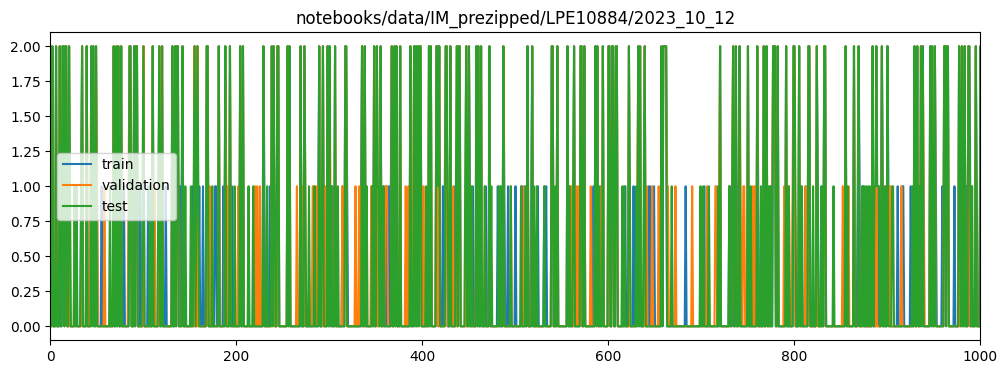

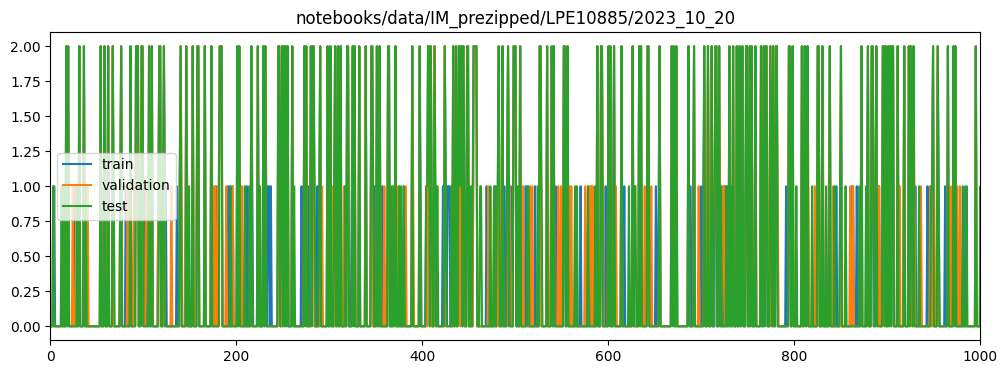

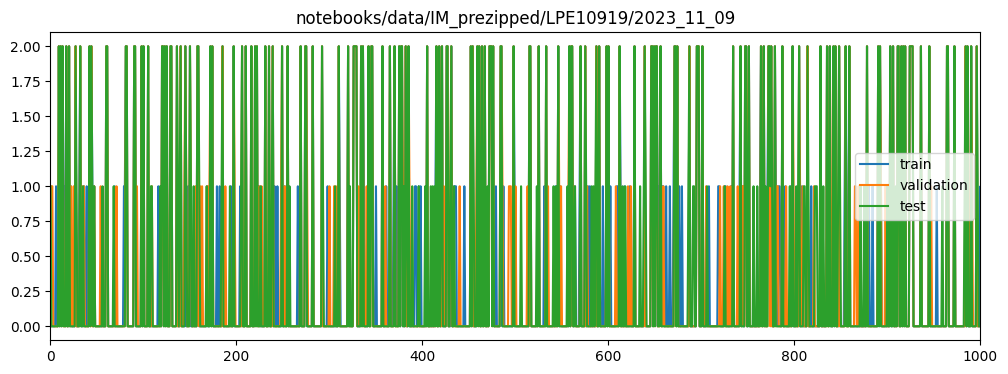

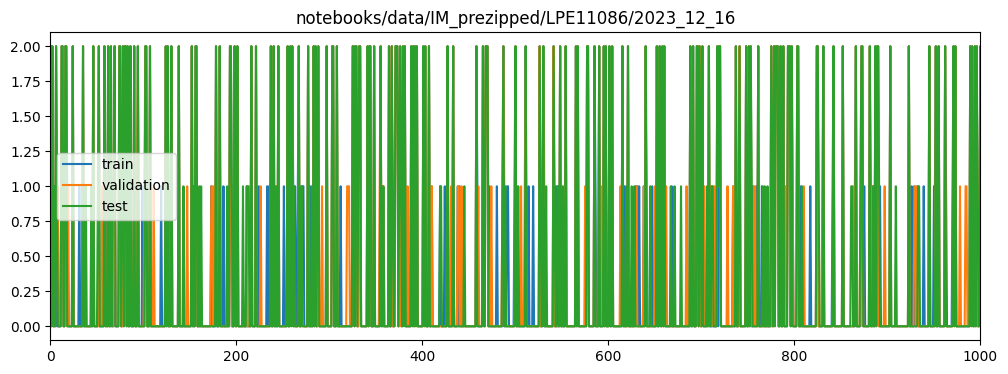

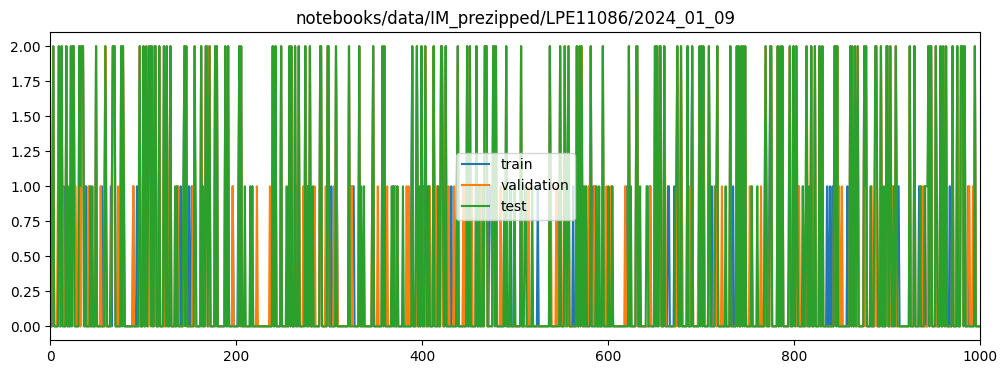

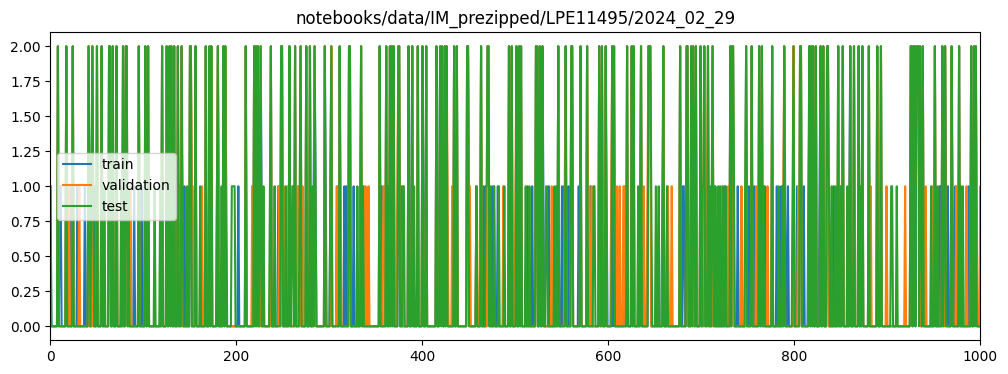

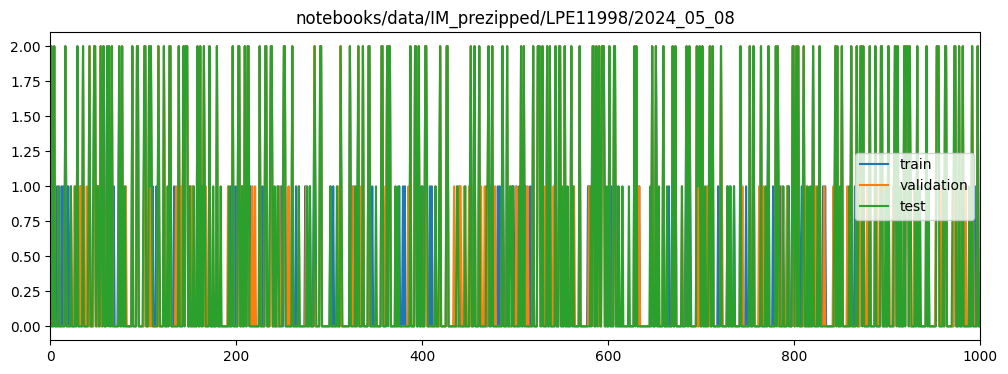

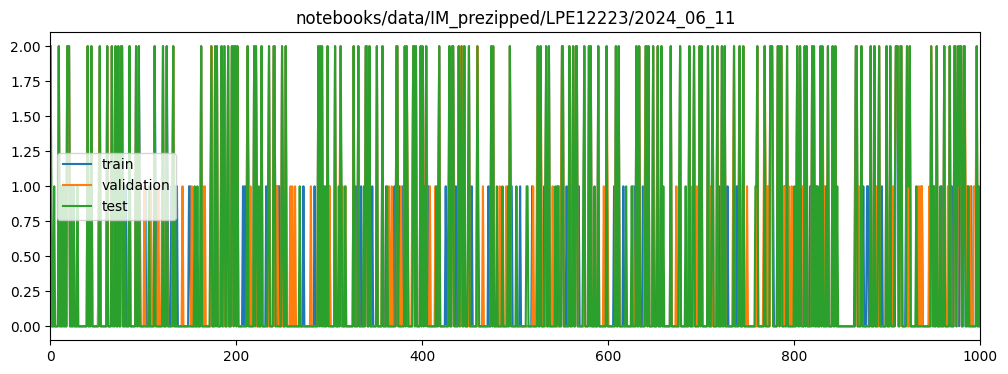

In [14]:
for folder in folders:
    print('Working on: ', folder)

    # read in original tiers
    tier_file = '/meta/trials/tiers.npy'
    tier_raw = np.load(os.path.join(folder + tier_file))

    # create 5 shuffles of train/val while keeping test data in place
    ensemble_tier = np.zeros((5, len(tier_raw)), dtype='<U10')
    train_val_locs = (tier_raw == 'train') | (tier_raw == 'validation')
    to_shuffle = tier_raw[train_val_locs]

    # seed here to make it independent of order of folders
    np.random.seed(35382)
    for i in range(5):
        ensemble_tier[i, :] = np.copy(tier_raw)
        ensemble_tier[i, train_val_locs] = np.random.permutation(to_shuffle)

    # save array
    np.save(folder + '/meta/trials/ensemble_tiers.npy', ensemble_tier)

    # double check that test data remains not shuffled
    plt.figure(figsize=(12, 4))
    plt.plot(tier_to_int(tier_raw))
    plt.plot(tier_to_int(ensemble_tier[2, :]))
    plt.plot(tier_to_int(ensemble_tier[3, :]))
    plt.title(folder)
    plt.legend(['train', 'validation', 'test', 'final_test'])
    plt.xlim((0, 1000))